In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Path to the CSV file
csv_file = "Metrics_IOTA_TX_msgs.csv"

#Read the CSV file and convert it into a DataFrame
df = pd.read_csv(csv_file, thousands='.', decimal=',')
df['msg_size']=df['msg_size'].apply('{:,}'.format)

# Display the DataFrame
df

,msg_size,connection_type,bytes_seg
0,100,wifi_localhost,120.336943
1,100,wifi_localhost,13.970383
2,100,wifi_localhost,27.677830
3,100,wifi_localhost,4.278075
4,100,wifi_localhost,7.380618
...,...,...,...
1547,"16,384",ethernet_chrysalis,242.931068
1548,"16,384",ethernet_chrysalis,96.326041
1549,"16,384",ethernet_chrysalis,1393.078820
1550,"16,384",ethernet_chrysalis,58.163849


Median after IQR:
msg_size  connection_type   
1,024     ethernet_chrysalis     55.797013
          ethernet_localhost     56.974350
          wifi_chrysalis         50.307050
          wifi_localhost         51.295640
100       ethernet_chrysalis     14.667641
          ethernet_localhost     16.019287
          wifi_chrysalis         13.709252
          wifi_localhost         19.398642
16,384    ethernet_chrysalis     88.072270
          ethernet_localhost     79.444268
          wifi_chrysalis         90.387686
          wifi_localhost         87.761869
8,192     ethernet_chrysalis    107.222324
          ethernet_localhost    102.778262
          wifi_chrysalis         90.590408
          wifi_localhost        116.829022
Name: bytes_seg, dtype: float64


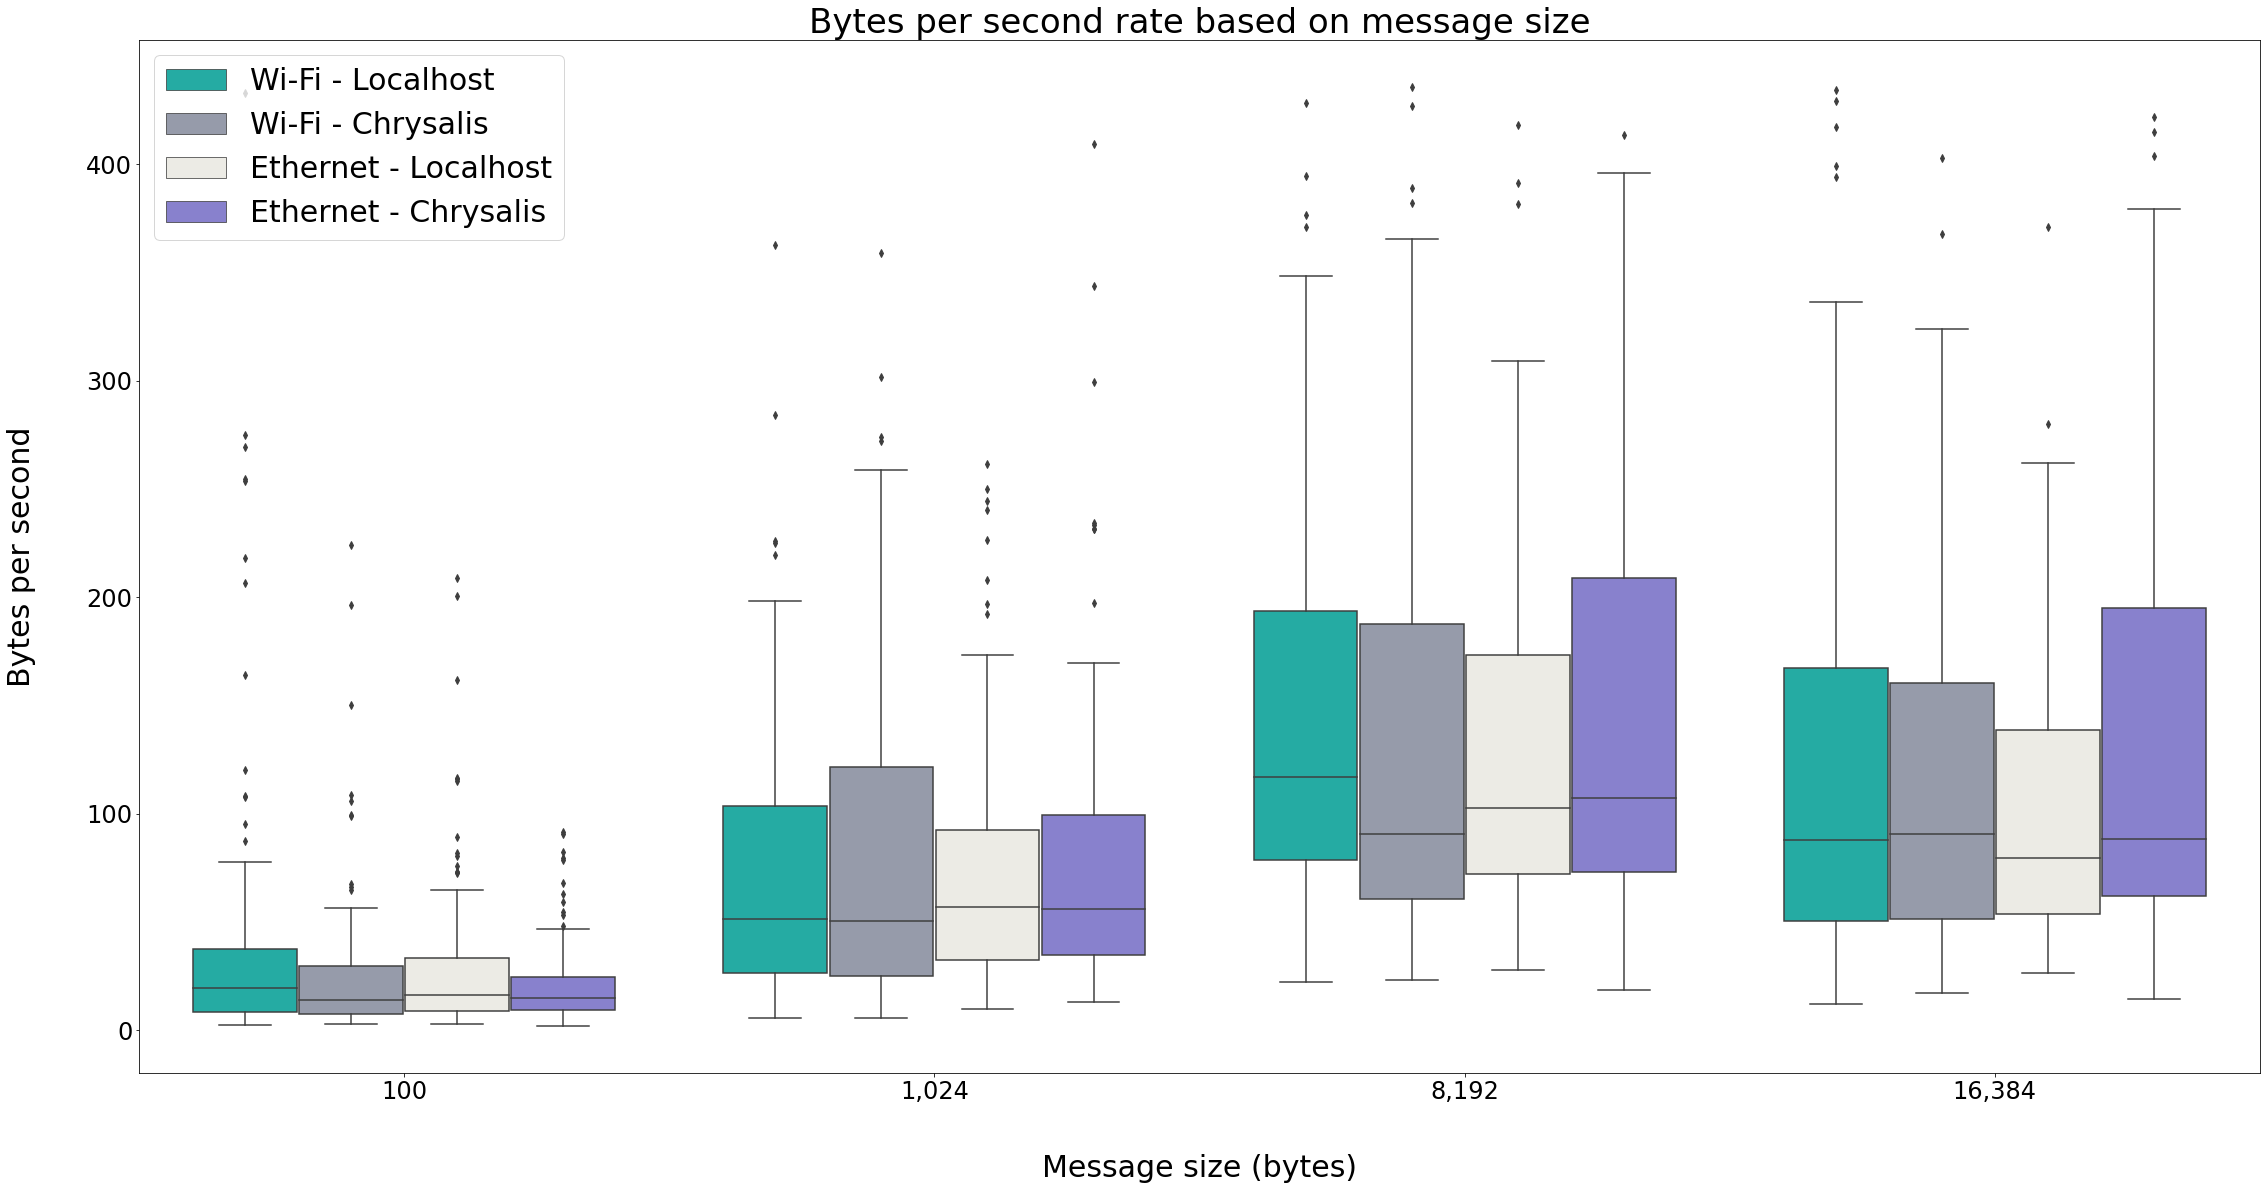

In [3]:
plt.figure(figsize=(38, 19))

# Calculate the interquartile range (IQR)
Q1 = df['bytes_seg'].quantile(0.25)
Q3 = df['bytes_seg'].quantile(0.75)
IQR = Q3 - Q1

#  Define limits to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define a custom color palette
custom_palette = ["#0fc1b7", "#9399AD", "#edece4", "#7D74DA"]  

# Set the custom color palette
sns.set_palette(custom_palette)

# Filter outliers
df_filtered = df[(df['bytes_seg'] >= lower_bound) & (df['bytes_seg'] <= upper_bound)]

# Create the boxplot with the filtered data
boxplot = sns.boxplot(x='msg_size', y='bytes_seg', hue='connection_type', data=df_filtered)

# Rest of the configuration and visualization code
plt.title('Bytes per second rate based on message size', fontsize=34)
plt.xlabel('Message size (bytes)', fontsize=30, labelpad=50)
plt.ylabel('Bytes per second', fontsize=30, labelpad=50)

handles, labels = boxplot.get_legend_handles_labels()
labels=['Wi-Fi - Localhost', 'Wi-Fi - Chrysalis', 'Ethernet - Localhost', 'Ethernet - Chrysalis']
plt.legend(handles, labels, loc="best", fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Calculate the median for each combination of 'msg_size' and 'connection_type'
medians = df_filtered.groupby(['msg_size', 'connection_type'])['bytes_seg'].median()

# Print the median values for each combination
print("Median after IQR:")
print(medians)

#plt.legend(title='Connection Type', labels=['Wi-Fi - Localhost', 'Wi-Fi - Chrysalis', 'Ethernet - Localhost', 'Ethernet - Chrysalis'])
plt.show()